# * WK7 Data Visualization <hr style="border:5.5px solid #126782"></hr>

Name: **Ghabriele Kim G. Villasis** <br>
Course: **BSCPE 2A**

In [193]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv(r"../raw/chip-dataset-cleansed.csv",
                 delimiter=",")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [197]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


# * N Chips Manufactured

In [198]:
df_w = df.copy()

In [199]:
chip_count = df_w['Foundry'].value_counts()
chip_count

Foundry
TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

In [200]:
type(chip_count)

pandas.core.series.Series

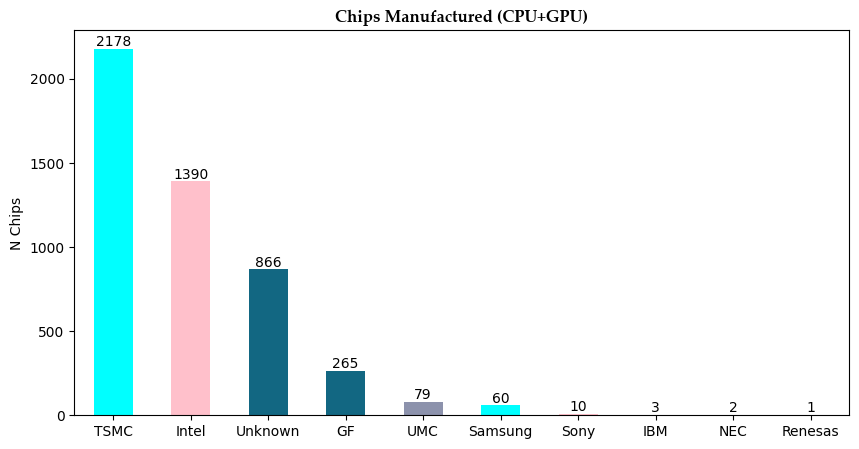

In [201]:
chart = chip_count.plot(kind='bar',
                        color = ['cyan','pink','#126782','#126782','#8C92AC'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.show()

<h2> N CPU Manufactured </h2>

In [202]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [203]:
cpu_count = df_cpu['Foundry'].value_counts()
cpu_count

Foundry
Intel      1242
Unknown     760
TSMC         97
GF           93
Name: count, dtype: int64

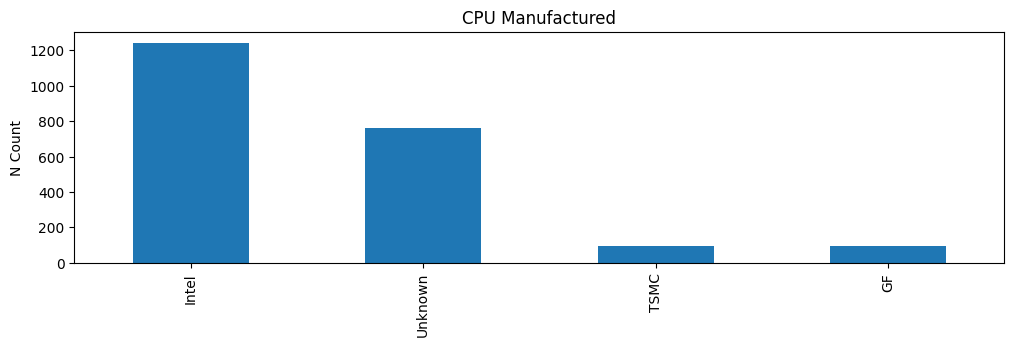

In [204]:
chart = cpu_count.plot(kind='bar',figsize=(12,3))
plt.title('CPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

<h2> N GPU Manufactured </h2>

In [205]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [206]:
gpu_count = df_gpu['Foundry'].value_counts()
gpu_count

Foundry
TSMC       2081
GF          172
Intel       148
Unknown     106
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

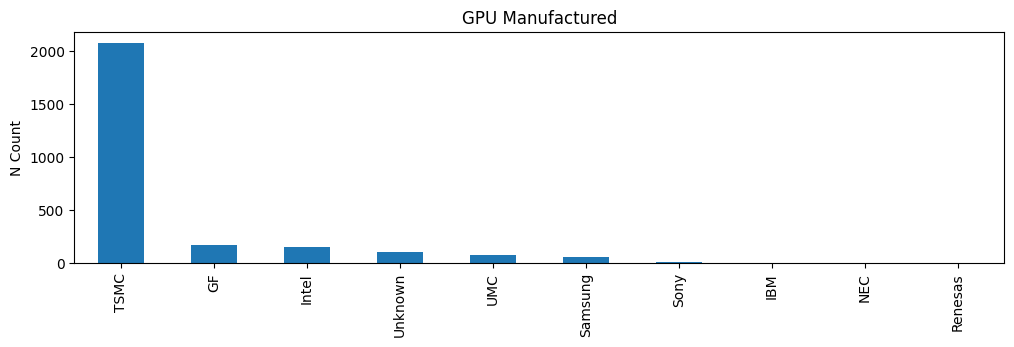

In [207]:
chart = gpu_count.plot(kind='bar',figsize=(12,3))
plt.title('GPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

# * List of Vendors

In [208]:
fd_count = df_w['Vendor'].value_counts()
fd_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

<h2> Sales Record </h2>

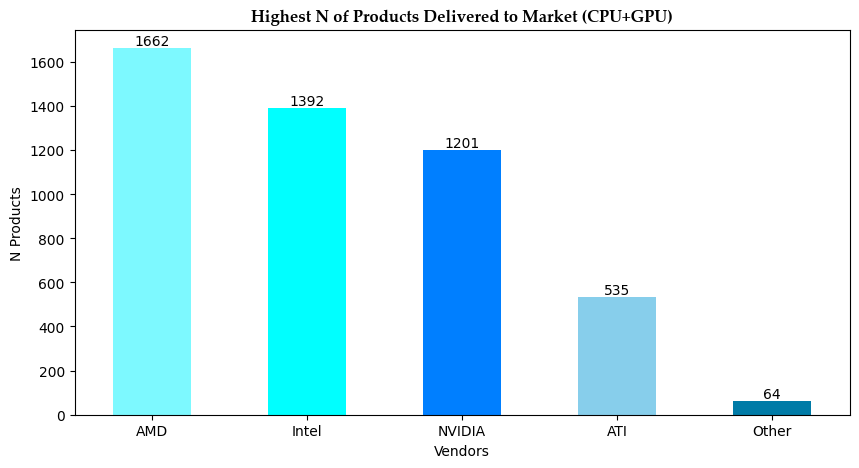

In [209]:
chart = fd_count.plot(kind='bar',
                        color = ['#7DF9FF','#00FFFF', '#007FFF', '#87CEEB', '#007BA7'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Highest N of Products Delivered to Market (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.xlabel('Vendors')
chart.set_xticklabels(fd_count.index, rotation=0)
plt.ylabel('N Products')
plt.show()

<h3> CPU Sales Record </h3>

In [210]:
fd_count_cpu = df_w[df_w['Type']=='CPU'].groupby('Vendor').size().sort_values(ascending=False)
fd_count_cpu

Vendor
Intel    1242
AMD       950
dtype: int64

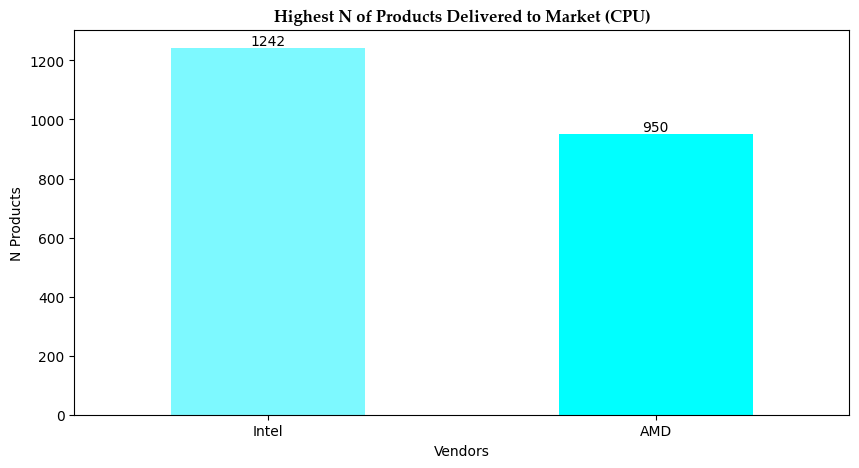

In [211]:
chart = fd_count_cpu.plot(kind='bar',
                        color = ['#7DF9FF','#00FFFF', '#007FFF', '#87CEEB', '#007BA7'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Highest N of Products Delivered to Market (CPU)',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.xlabel('Vendors')
chart.set_xticklabels(fd_count_cpu.index, rotation=0)
plt.ylabel('N Products')
plt.show()

<h3> GPU Sales Record </h3>

In [212]:
fd_count_gpu = df_w[df_w['Type']=='GPU'].groupby('Vendor').size().sort_values(ascending=False)
fd_count_gpu

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
dtype: int64

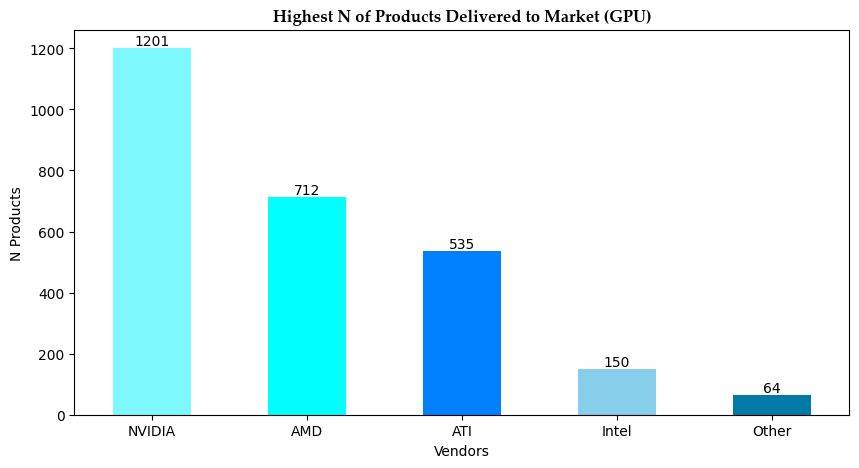

In [213]:
chart = fd_count_gpu.plot(kind='bar',
                        color = ['#7DF9FF','#00FFFF', '#007FFF', '#87CEEB', '#007BA7'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Highest N of Products Delivered to Market (GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.xlabel('Vendors')
chart.set_xticklabels(fd_count_gpu.index, rotation=0)
plt.ylabel('N Products')
plt.show()

# * Lowest TDP (Thermal Design Power)

In [214]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [215]:
type(df_tdp)

pandas.core.frame.DataFrame

In [216]:
df_tdp = df_tdp.sort_values(by='TDP', ascending=False)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
4735,NVIDIA Quadro Plex 2200 D2,640.0
...,...,...
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
469,Intel Atom Z620,1.0
1964,Intel Atom Z600,1.0


In [217]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
4735,NVIDIA Quadro Plex 2200 D2,640.0
4605,NVIDIA Quadro Plex 2100 S4,640.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0


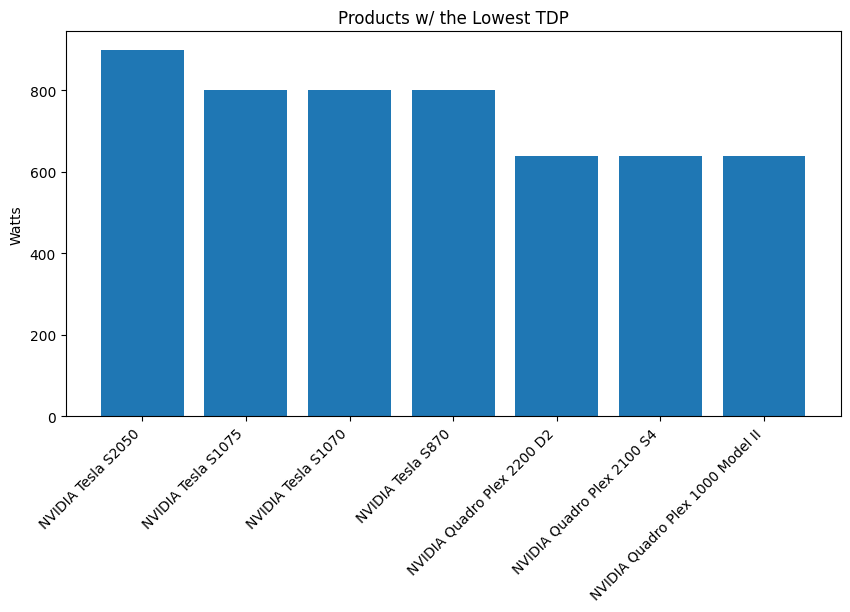

In [218]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'],df_tdp["TDP"])
plt.title('Products w/ the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

# * Process Size Trend

<h2> GPU Process Size Trend </h2>

In [219]:
df_ps_gpu = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps_gpu

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [220]:
df_ps_gpu['Date'] = pd.to_datetime(df_ps_gpu['Date'])
df_ps_gpu['Year'] = df_ps_gpu['Date'].dt.year
df_ps_gpu

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [221]:
df_ps_gpu = df_ps_gpu.groupby('Year')['Process_Size'].mean().reset_index()
df_ps_gpu

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


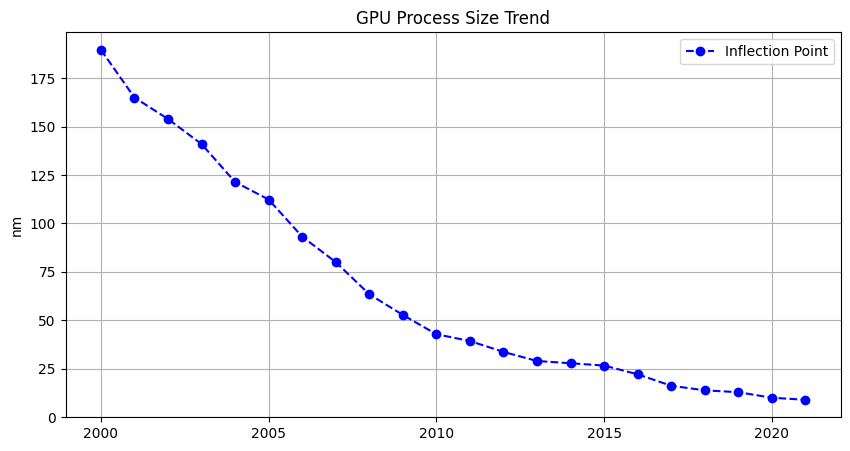

In [222]:
plt.figure(figsize=(10,5))
plt.plot(df_ps_gpu['Year'],df_ps_gpu['Process_Size'], marker='o', linestyle='--', color='blue', label="Inflection Point")
plt.title('GPU Process Size Trend')
plt.ylabel('nm')
plt.legend()
plt.grid(True)

<h2> CPU Process Size Trend </h2>

In [223]:
df_ps_cpu = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_ps_cpu

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [224]:
df_ps_cpu['Date'] = pd.to_datetime(df_ps_cpu['Date'])
df_ps_cpu['Year'] = df_ps_cpu['Date'].dt.year
df_ps_cpu

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [225]:
df_ps_cpu = df_ps_cpu.groupby('Year')['Process_Size'].mean().reset_index()
df_ps_cpu

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


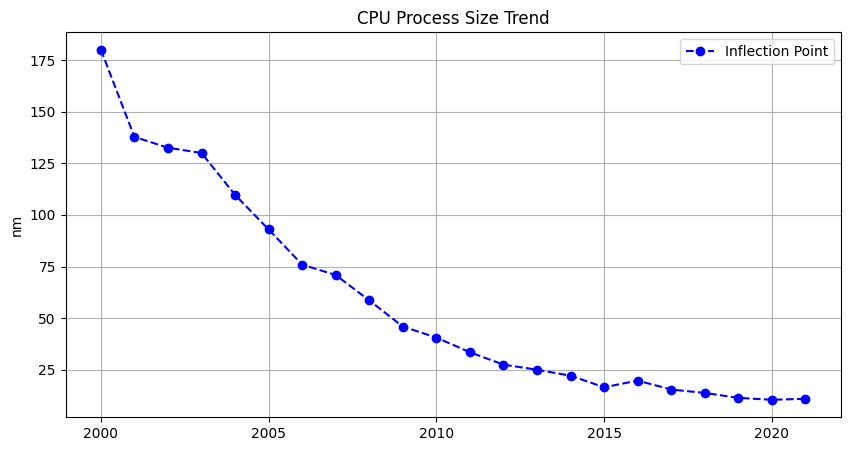

In [226]:
plt.figure(figsize=(10,5))
plt.plot(df_ps_cpu['Year'],df_ps_cpu['Process_Size'], marker='o', linestyle='--', color='blue', label="Inflection Point")
plt.title('CPU Process Size Trend')
plt.ylabel('nm')
plt.legend()
plt.grid(True)

# * Die_Size

In [227]:
df_sz = df_w[['Type','Product','Die_Size','Date']]
df_sz

,Type,Product,Die_Size,Date
0,CPU,AMD Athlon 64 3500+,77.000000,2/20/2007
1,CPU,AMD Athlon 200GE,192.000000,9/6/2018
2,CPU,Intel Core i5-1145G7,188.440445,9/2/2020
3,CPU,Intel Xeon E5-2603 v2,160.000000,9/1/2013
4,CPU,AMD Phenom II X4 980 BE,258.000000,5/3/2011
...,...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,332.000000,2/22/2011
4850,GPU,Intel GMA 950,188.440445,6/1/2005
4851,GPU,NVIDIA GeForce GT 320M,100.000000,3/3/2010
4852,GPU,NVIDIA GeForce FX 5200,65.000000,3/6/2003


In [228]:
df_sz.describe()


,Die_Size
count,4854.000000
mean,188.440445
std,116.523337
min,1.000000
25%,112.000000
50%,177.000000
75%,221.000000
max,826.000000


In [229]:
type(df_sz)


pandas.core.frame.DataFrame

In [230]:
df_sz.fillna(df_sz['Die_Size'].median, inplace=True) 

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7960\843853132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sz.fillna(df_sz['Die_Size'].median, inplace=True)


<h2> Die Size Visualization </h2>

Line Plot of Individual CPU & GPU Die_Sizes

In [231]:
df_sz['Year'] = pd.to_datetime(df_sz['Date'], errors='coerce').dt.year

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7960\1203939117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sz['Year'] = pd.to_datetime(df_sz['Date'], errors='coerce').dt.year


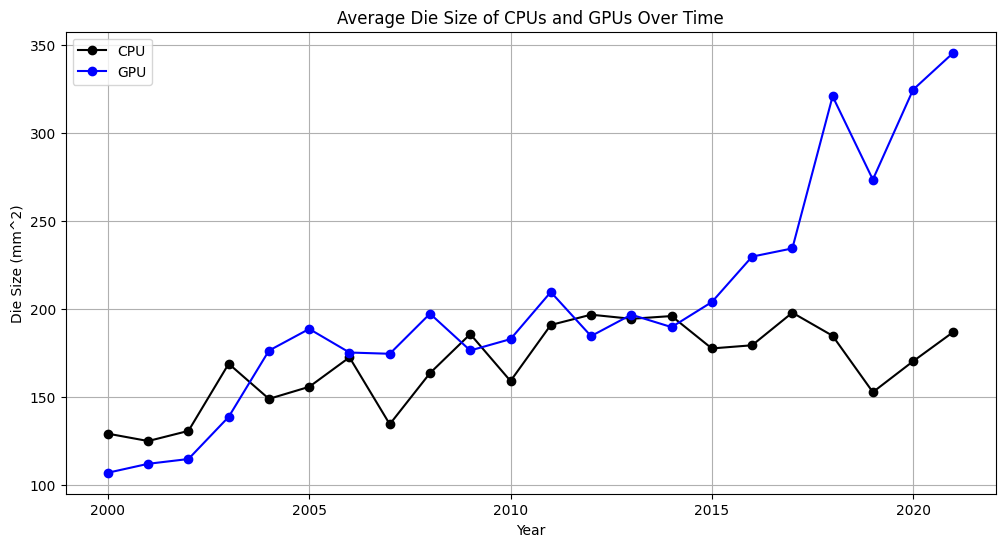

In [232]:
df_cpu_sz = df_sz[df_sz['Type'] == 'CPU'].groupby('Year', as_index=False)['Die_Size'].mean()
df_gpu_sz = df_sz[df_sz['Type'] == 'GPU'].groupby('Year', as_index=False)['Die_Size'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_cpu_sz['Year'], df_cpu_sz['Die_Size'], marker='o', linestyle='-', color='black', label="CPU")
plt.plot(df_gpu_sz['Year'], df_gpu_sz['Die_Size'], marker='o', linestyle='-', color='blue', label="GPU")
plt.title('Average Die Size of CPUs and GPUs Over Time')
plt.xlabel('Year')
plt.ylabel('Die Size (mm^2)')
plt.legend()
plt.grid(True)
plt.show()

Scatter Plot of Individual CPU & GPU Die_Sizes

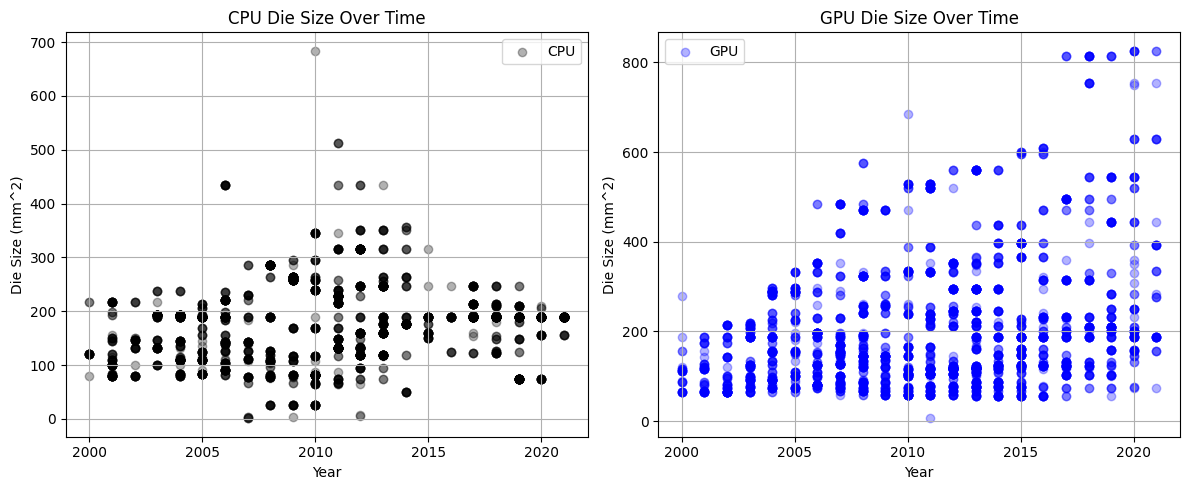

In [233]:
df_cpu_sz = df_sz[df_sz['Type'] == 'CPU']
df_gpu_sz = df_sz[df_sz['Type'] == 'GPU']

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
ax[0].scatter(df_cpu_sz['Year'], df_cpu_sz['Die_Size'], color='black', alpha=0.3, label="CPU")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Die Size (mm^2)")
ax[0].set_title("CPU Die Size Over Time")
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(df_gpu_sz['Year'], df_gpu_sz['Die_Size'], color='blue', alpha=0.3, label="GPU")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Die Size (mm^2)")
ax[1].set_title("GPU Die Size Over Time")
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()


# * Transistors

In [234]:
df_tr = df_w[['Type','Product','Date','Transistors']]
df_tr

,Type,Product,Date,Transistors
0,CPU,AMD Athlon 64 3500+,2/20/2007,122.000000
1,CPU,AMD Athlon 200GE,9/6/2018,4800.000000
2,CPU,Intel Core i5-1145G7,9/2/2020,1929.922279
3,CPU,Intel Xeon E5-2603 v2,9/1/2013,1400.000000
4,CPU,AMD Phenom II X4 980 BE,5/3/2011,758.000000
...,...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,2/22/2011,1950.000000
4850,GPU,Intel GMA 950,6/1/2005,1929.922279
4851,GPU,NVIDIA GeForce GT 320M,3/3/2010,486.000000
4852,GPU,NVIDIA GeForce FX 5200,3/6/2003,29.000000


In [235]:
df_tr.describe()

,Transistors
count,4854.000000
mean,1929.922279
std,3736.859205
min,8.000000
25%,180.000000
50%,950.000000
75%,1929.922279
max,54200.000000


In [236]:
df_tr = df_tr.sort_values(by='Transistors', ascending=False).dropna()
df_tr

,Type,Product,Date,Transistors
3134,GPU,NVIDIA A100 SXM4 40 GB,5/14/2020,54200.0
3911,GPU,NVIDIA A100 PCIe,6/22/2020,54200.0
3156,GPU,NVIDIA GRID A100B,5/14/2020,54200.0
2942,GPU,NVIDIA GRID A100A,5/14/2020,54200.0
4450,GPU,NVIDIA A30 PCIe,4/12/2021,54200.0
...,...,...,...,...
4185,GPU,Matrox Millennium G550,11/26/2001,10.0
2794,GPU,Matrox Millennium G550 PCIe,11/26/2001,10.0
2992,GPU,Matrox Millennium G450 LP,NaT,10.0
4845,GPU,NVIDIA Tegra 3 GPU,11/9/2011,10.0


In [237]:
df_tr['Year'] = pd.to_datetime(df_tr['Date'], errors='coerce').dt.year
df_tr

,Type,Product,Date,Transistors,Year
3134,GPU,NVIDIA A100 SXM4 40 GB,5/14/2020,54200.0,2020.0
3911,GPU,NVIDIA A100 PCIe,6/22/2020,54200.0,2020.0
3156,GPU,NVIDIA GRID A100B,5/14/2020,54200.0,2020.0
2942,GPU,NVIDIA GRID A100A,5/14/2020,54200.0,2020.0
4450,GPU,NVIDIA A30 PCIe,4/12/2021,54200.0,2021.0
...,...,...,...,...,...
4185,GPU,Matrox Millennium G550,11/26/2001,10.0,2001.0
2794,GPU,Matrox Millennium G550 PCIe,11/26/2001,10.0,2001.0
2992,GPU,Matrox Millennium G450 LP,NaT,10.0,NaN
4845,GPU,NVIDIA Tegra 3 GPU,11/9/2011,10.0,2011.0


<h2> Transistors Count Visualization </h2>

Line Plot

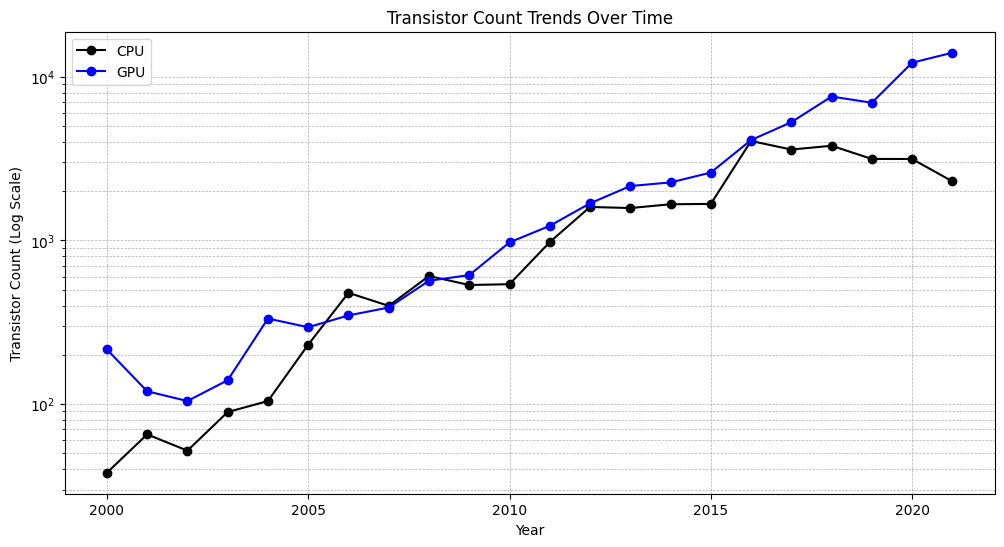

In [238]:
df_cpu_tr = df_tr[df_tr['Type'] == 'CPU'].groupby('Year', as_index=False)['Transistors'].mean()
df_gpu_tr = df_tr[df_tr['Type'] == 'GPU'].groupby('Year', as_index=False)['Transistors'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_cpu_tr['Year'], df_cpu_tr['Transistors'], marker='o', linestyle='-', color='black', label="CPU")
plt.plot(df_gpu_tr['Year'], df_gpu_tr['Transistors'], marker='o', linestyle='-', color='blue', label="GPU")
plt.yscale("log")  
plt.xlabel("Year")
plt.ylabel("Transistor Count (Log Scale)")
plt.title("Transistor Count Trends Over Time")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

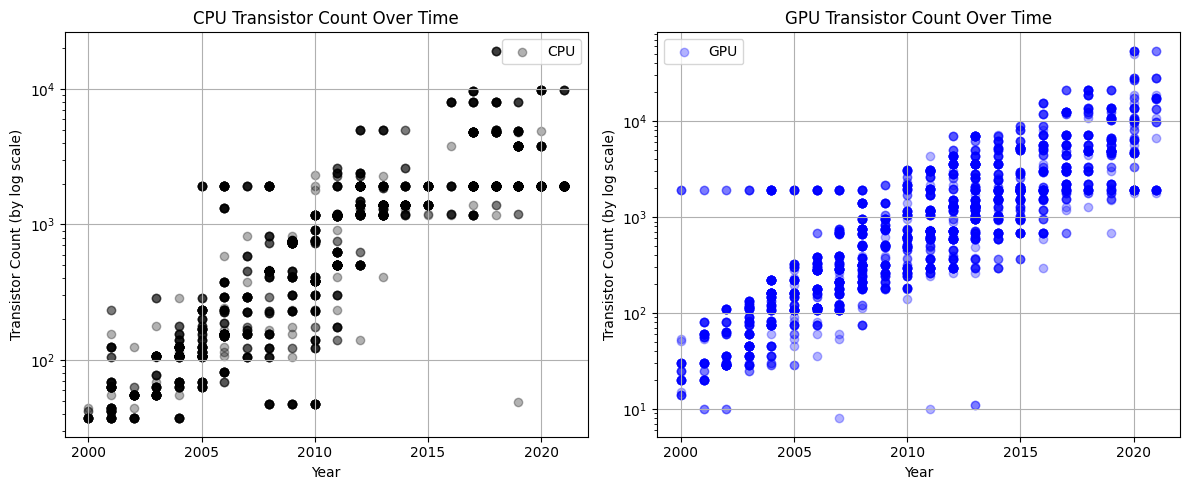

In [239]:
df_cpu_tr = df_tr[df_tr['Type'] == 'CPU']
df_gpu_tr = df_tr[df_tr['Type'] == 'GPU']

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
ax[0].scatter(df_cpu_tr['Year'], df_cpu_tr['Transistors'], color='black', alpha=0.3, label="CPU")
ax[0].set_yscale("log") 
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Transistor Count (by log scale)")
ax[0].set_title("CPU Transistor Count Over Time")
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(df_gpu_tr['Year'], df_gpu_tr['Transistors'], color='blue', alpha=0.3, label="GPU")
ax[1].set_yscale("log") 
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Transistor Count (by log scale)") 
ax[1].set_title("GPU Transistor Count Over Time")
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

# * Frequency

In [240]:
df_fq = df_w[['Type','Product','Date','Frequency']]
df_fq

,Type,Product,Date,Frequency
0,CPU,AMD Athlon 64 3500+,2/20/2007,2200
1,CPU,AMD Athlon 200GE,9/6/2018,3200
2,CPU,Intel Core i5-1145G7,9/2/2020,2600
3,CPU,Intel Xeon E5-2603 v2,9/1/2013,1800
4,CPU,AMD Phenom II X4 980 BE,5/3/2011,3700
...,...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,2/22/2011,450
4850,GPU,Intel GMA 950,6/1/2005,250
4851,GPU,NVIDIA GeForce GT 320M,3/3/2010,500
4852,GPU,NVIDIA GeForce FX 5200,3/6/2003,250


In [241]:
df_fq.describe()

,Frequency
count,4854.000000
mean,1484.406057
std,1066.701523
min,100.000000
25%,590.000000
50%,1073.500000
75%,2400.000000
max,4700.000000


In [242]:
df_fq = df_fq.sort_values(by='Frequency', ascending=False).dropna()
df_fq

,Type,Product,Date,Frequency
225,CPU,AMD FX-9590,7/6/2013,4700
727,CPU,AMD FX-9370,7/6/2013,4400
1115,CPU,Intel Pentium Gold G6605,3/16/2021,4300
1472,CPU,Intel Core i3-7360X,10/3/2017,4300
237,CPU,Intel Core i7-7740X,6/26/2017,4300
...,...,...,...,...
3164,GPU,ATI Fire GL2,6/1/2000,120
4357,GPU,NVIDIA Vanta LT,3/1/2000,105
3507,GPU,Intel i830MG Graphics,1/1/2002,100
4360,GPU,Intel HD Graphics,1/5/2015,100


In [243]:
df_fq['Year'] = pd.to_datetime(df_fq['Date'], errors='coerce').dt.year
df_fq

,Type,Product,Date,Frequency,Year
225,CPU,AMD FX-9590,7/6/2013,4700,2013.0
727,CPU,AMD FX-9370,7/6/2013,4400,2013.0
1115,CPU,Intel Pentium Gold G6605,3/16/2021,4300,2021.0
1472,CPU,Intel Core i3-7360X,10/3/2017,4300,2017.0
237,CPU,Intel Core i7-7740X,6/26/2017,4300,2017.0
...,...,...,...,...,...
3164,GPU,ATI Fire GL2,6/1/2000,120,2000.0
4357,GPU,NVIDIA Vanta LT,3/1/2000,105,2000.0
3507,GPU,Intel i830MG Graphics,1/1/2002,100,2002.0
4360,GPU,Intel HD Graphics,1/5/2015,100,2015.0


<h2> Product (CPU + GPU) Frequency Visualization </h2>

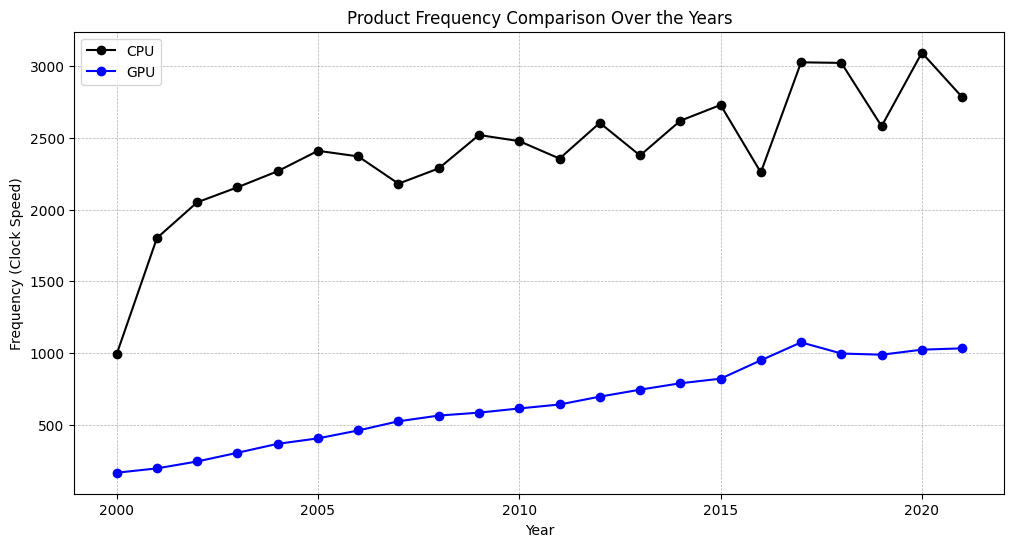

In [244]:
df_cpu_fq = df_fq[df_fq['Type'] == 'CPU'].groupby('Year', as_index=False)['Frequency'].mean()
df_gpu_fq = df_fq[df_fq['Type'] == 'GPU'].groupby('Year', as_index=False)['Frequency'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_cpu_fq['Year'], df_cpu_fq['Frequency'], marker='o', linestyle='-', color='black', label="CPU")
plt.plot(df_gpu_fq['Year'], df_gpu_fq['Frequency'], marker='o', linestyle='-', color='blue', label="GPU")
plt.xlabel("Year")
plt.ylabel("Frequency (Clock Speed)")
plt.title("Product Frequency Comparison Over the Years")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# * Analysis of CPU and GPU Trends Based on the Dataset



The dataset examines the trends in CPU and GPU development over the years, focusing on manufacturing dominance, sales performance, power efficiency, and technological advancements. Through data visualization, key patterns in transistor count, die size, and TDP have been identified, providing insights into the evolving landscape of processors, and revealing that TSMC leads as the most prolific manufacturer, producing a total of 2,178 overall and 2,081 GPU units across different product lines. In the CPU segment, Intel emerges as the dominant manufacturer, accounting for 1,242 units. Additionally, Intel also holds the position of the top-selling CPU brand. However, in overall sales across both CPUs and GPUs, AMD surpasses Intel, securing 1,662 total sales, making it the highest-selling vendor in the dataset. The dataset provides insights into the trade-offs between performance and power consumption. For example, the 'NVIDIA Tesla S2050' stands out as an ideal choice for high-performance, server-grade computing applications, offering advanced capabilities at the cost of higher power consumption. Conversely, processors from the 'Intel Atom' product line are optimized for low power consumption, making them suitable for energy-efficient devices where minimal heat output is a priority.

Examining trends over time suggests a continuous increase in both die size and transistor count, reflecting advancements in semiconductor technology. However, a notable distinction exists between CPUs and GPUs:

- Die Size: GPU die sizes exhibit a broader range, with many models exceeding 200 mm^2, while the majority of CPU die sizes remain below this threshold. This difference is likely due to GPUs' architectural design, which prioritizes parallel processing efficiency.
- Transistor Count: Both CPUs and GPUs have experienced a steady increase in transistor density, following Moore’s Law. However, GPUs generally feature a significantly higher transistor count than CPUs, reinforcing their role in handling large-scale parallel computations.
- Frequency (Clock Speed): CPUs and GPUs show significant differences in clock speeds, which is expected given their distinct functional roles. CPUs, designed for sequential processing and complex tasks, typically exhibit higher clock speeds, whereas GPUs, optimized for parallel workloads, operate at relatively lower frequencies while leveraging a high core count for computational efficiency.

The dataset highlights critical trends in CPU and GPU evolution, reinforcing the distinction between the two architectures. CPUs remain optimized for general-purpose computing and high-speed processing of sequential tasks, while GPUs continue to evolve towards highly parallelized workloads, making them indispensable for applications such as AI, machine learning, and gaming.